In [26]:
!pip install jinja2

You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
%pwd

'/workspaces/xarray_frac'

In [1]:
%%bash
pip install --upgrade numpy
pip install xarray
pip install dask
pip install distributed
pip install jinja2
pip install matplotlib
pip install -e .

Obtaining file:///workspaces/xarray_frac
  Attempting uninstall: xarrayfrac
    Found existing installation: xarrayfrac 0.0.1
    Uninstalling xarrayfrac-0.0.1:
      Successfully uninstalled xarrayfrac-0.0.1
  Running setup.py develop for xarrayfrac


You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
from dask.distributed import LocalCluster, Client
import xarray as xr

/workspaces/xarray_frac/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
ds = xr.open_dataset(None, engine="xarray_frac", resolution=100000, chunks={"x": 2000, "y": 2000})

In [3]:
ds

<xarray.Dataset>
Dimensions:  (x: 100000, y: 100000)
Coordinates:
  * x        (x) float64 -2.0 -2.0 -2.0 -2.0 -2.0 -2.0 ... 2.0 2.0 2.0 2.0 2.0
  * y        (y) float64 -2.0 -2.0 -2.0 -2.0 -2.0 -2.0 ... 2.0 2.0 2.0 2.0 2.0
Data variables:
    frac     (x, y) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>

In [4]:
ds.frac.isel(x=2, y=2).compute()

<xarray.DataArray 'frac' ()>
array(0)
Coordinates:
    x        float64 -2.0
    y        float64 -2.0

In [6]:
sampled = ds.frac.isel(x=slice(0, 100000, 100), y=slice(0, 100000, 100))

In [7]:
sampled

<xarray.DataArray 'frac' (x: 1000, y: 1000)>
dask.array<getitem, shape=(1000, 1000), dtype=float32, chunksize=(20, 20), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -2.0 -1.996 -1.992 -1.988 ... 1.984 1.988 1.992 1.996
  * y        (y) float64 -2.0 -1.996 -1.992 -1.988 ... 1.984 1.988 1.992 1.996

In [8]:
#sampled = sampled.compute()

In [9]:
from matplotlib import pyplot as plt

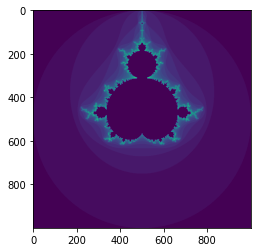

In [11]:
plt.imshow(sampled)


In [12]:
window = ds.where((ds.x > -0.1) & (ds.x < 0.1), drop=True).where((ds.y > 0.9) & (ds.y < 1.0), drop=True)

/workspaces/xarray_frac/.venv/lib/python3.8/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [13]:
window.frac[::10, ::10]

<xarray.DataArray 'frac' (x: 500, y: 250)>
dask.array<getitem, shape=(500, 250), dtype=float32, chunksize=(200, 150), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -0.09998 -0.09958 -0.09918 ... 0.09882 0.09922 0.09962
  * y        (y) float64 0.9 0.9004 0.9008 0.9012 ... 0.9988 0.9992 0.9996

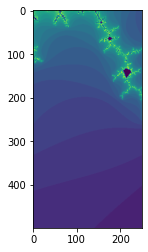

In [14]:
plt.imshow(window.frac[::10, ::10])